In [6]:
# map google drive and go to ur project directory.
import os
project_path = "/content/drive/MyDrive/Colab Notebooks/MyPracticeProjects"
os.chdir(project_path)
print("CWD : ", os.getcwd())
print("Files : ", os.listdir())

CWD :  /content/drive/MyDrive/Colab Notebooks/MyPracticeProjects
Files :  ['MyPracticeProjects.ipynb', 'app.py', 'utility.py', 'css', 'setup.sh']


In [27]:
# run setup.sh to set the environment variables for streamlit
!sh setup.sh

In [28]:
# check contents
!cat ~/.streamlit/credentials.toml
!cat ~/.streamlit/config.toml

[general]
email = "pratapvcbz@gmail.com"

[server]
headless = true
enableCORS=false
port = 80



In [ ]:
# install pyngrok and streamlit
!pip install pyngrok
!pip install streamlit

In [38]:
!ps -ef|grep ngrok|grep -v grep
!ps -ef|grep streamlit|grep -v grep

root         418      54  0 15:04 ?        00:00:01 /usr/local/lib/python3.6/dist-packages/pyngrok/bin/ngrok start --none --log=stdout
root         494       1  2 15:06 ?        00:00:12 /usr/bin/python3 /usr/local/bin/streamlit run --server.port 80 app.py


In [39]:
!kill -9 418 494

In [35]:
# run streamlit app
!streamlit run --server.port 80 app.py&>/dev/null&

In [31]:
# import ngrok and run on port 80
from pyngrok import ngrok
pub_url = ngrok.connect(port='80')
pub_url

<NgrokTunnel: "http://d21903450153.ngrok.io" -> "http://localhost:80">

In [37]:
# check memory usage
!nvidia-smi

Thu Dec  3 15:13:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Start car price prediction EDA and modelling**

In [74]:
# import packages
import pandas as pd
import numpy as np
import datetime

In [41]:
# read dataset
df = pd.read_csv('datasets/car data.csv')
print("shape : ",df.shape)
df.head()

shape :  (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
df.info(), print(""), print(" Check for null value count ".center(50, "#")), 
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

########### Check for null value count ###########


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [59]:
# check data description
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [57]:
# check no. of unique values in categorical features

for col in df.select_dtypes(include='object').columns.tolist():
    print(f'{col} has {df[col].nunique()} values : {set(df[col])}')

Car_Name has 98 values : {'fortuner', 'xcent', 'Hero Glamour', 'creta', 'corolla', 'swift', 'Yamaha FZ S ', 'Bajaj Pulsar NS 200', 'jazz', 'Bajaj Pulsar 220 F', 'Honda CB Trigger', 'Honda CB Shine', 'baleno', 'Royal Enfield Classic 500', 'Suzuki Access 125', 'KTM RC200', 'TVS Apache RTR 180', 's cross', '800', 'Hero Honda Passion Pro', 'ertiga', 'Royal Enfield Bullet 350', 'wagon r', 'Hyosung GT250R', 'Hero Passion X pro', 'etios cross', 'Activa 4g', 'Hero Splender Plus', 'city', 'i10', 'Yamaha Fazer ', 'ritz', 'Bajaj Discover 100', 'UM Renegade Mojave', 'vitara brezza', 'Hero Honda CBZ extreme', 'Activa 3g', 'corolla altis', 'omni', 'Yamaha FZ S V 2.0', 'Yamaha FZ  v 2.0', 'etios gd', 'Mahindra Mojo XT300', 'eon', 'Honda Activa 125', 'alto 800', 'ciaz', 'dzire', 'Yamaha FZ 16', 'KTM RC390', 'Hero  CBZ Xtreme', 'TVS Sport ', 'Royal Enfield Thunder 350', 'innova', 'brio', 'camry', 'Bajaj Avenger 150 street', 'Bajaj Dominar 400', 'TVS Apache RTR 160', 'etios liva', 'Hero Super Splendor',

In [73]:
# since car name has high unique values, lets drop it
df.drop('Car_Name', axis=1, inplace=True)
df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [144]:
df.Owner.unique()

array([0, 1, 3])

In [82]:
# feature engineering with date featurs
df['current_year'] = datetime.datetime.now().year
df['car_age'] = df['current_year'] -  df['Year']

df.drop(['current_year', 'Year'], axis=1, inplace=True) # dropping as new feature created.
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [83]:
# convert categorical feature to numrical feautes
# one hot encoding using get_dummies

df = pd.get_dummies(df, drop_first=True)
print("New shape : ", df.shape)
df.head()

New shape :  (301, 9)


,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [84]:
# check co-relation among features.
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
car_age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


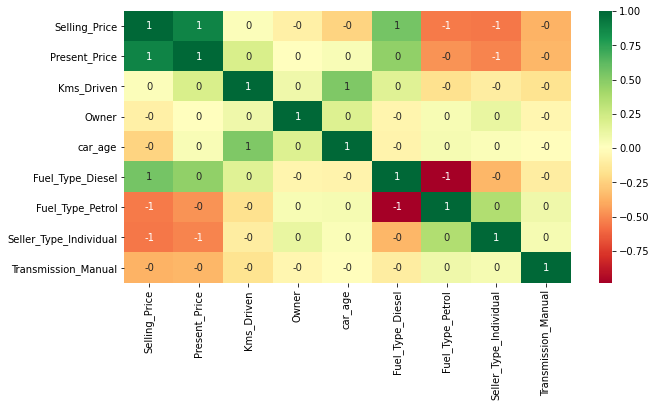

In [101]:
# visual representation of co-relation using searborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,5))
ax = sns.heatmap(df.corr(), annot=True, fmt='.0f', cmap='RdYlGn')

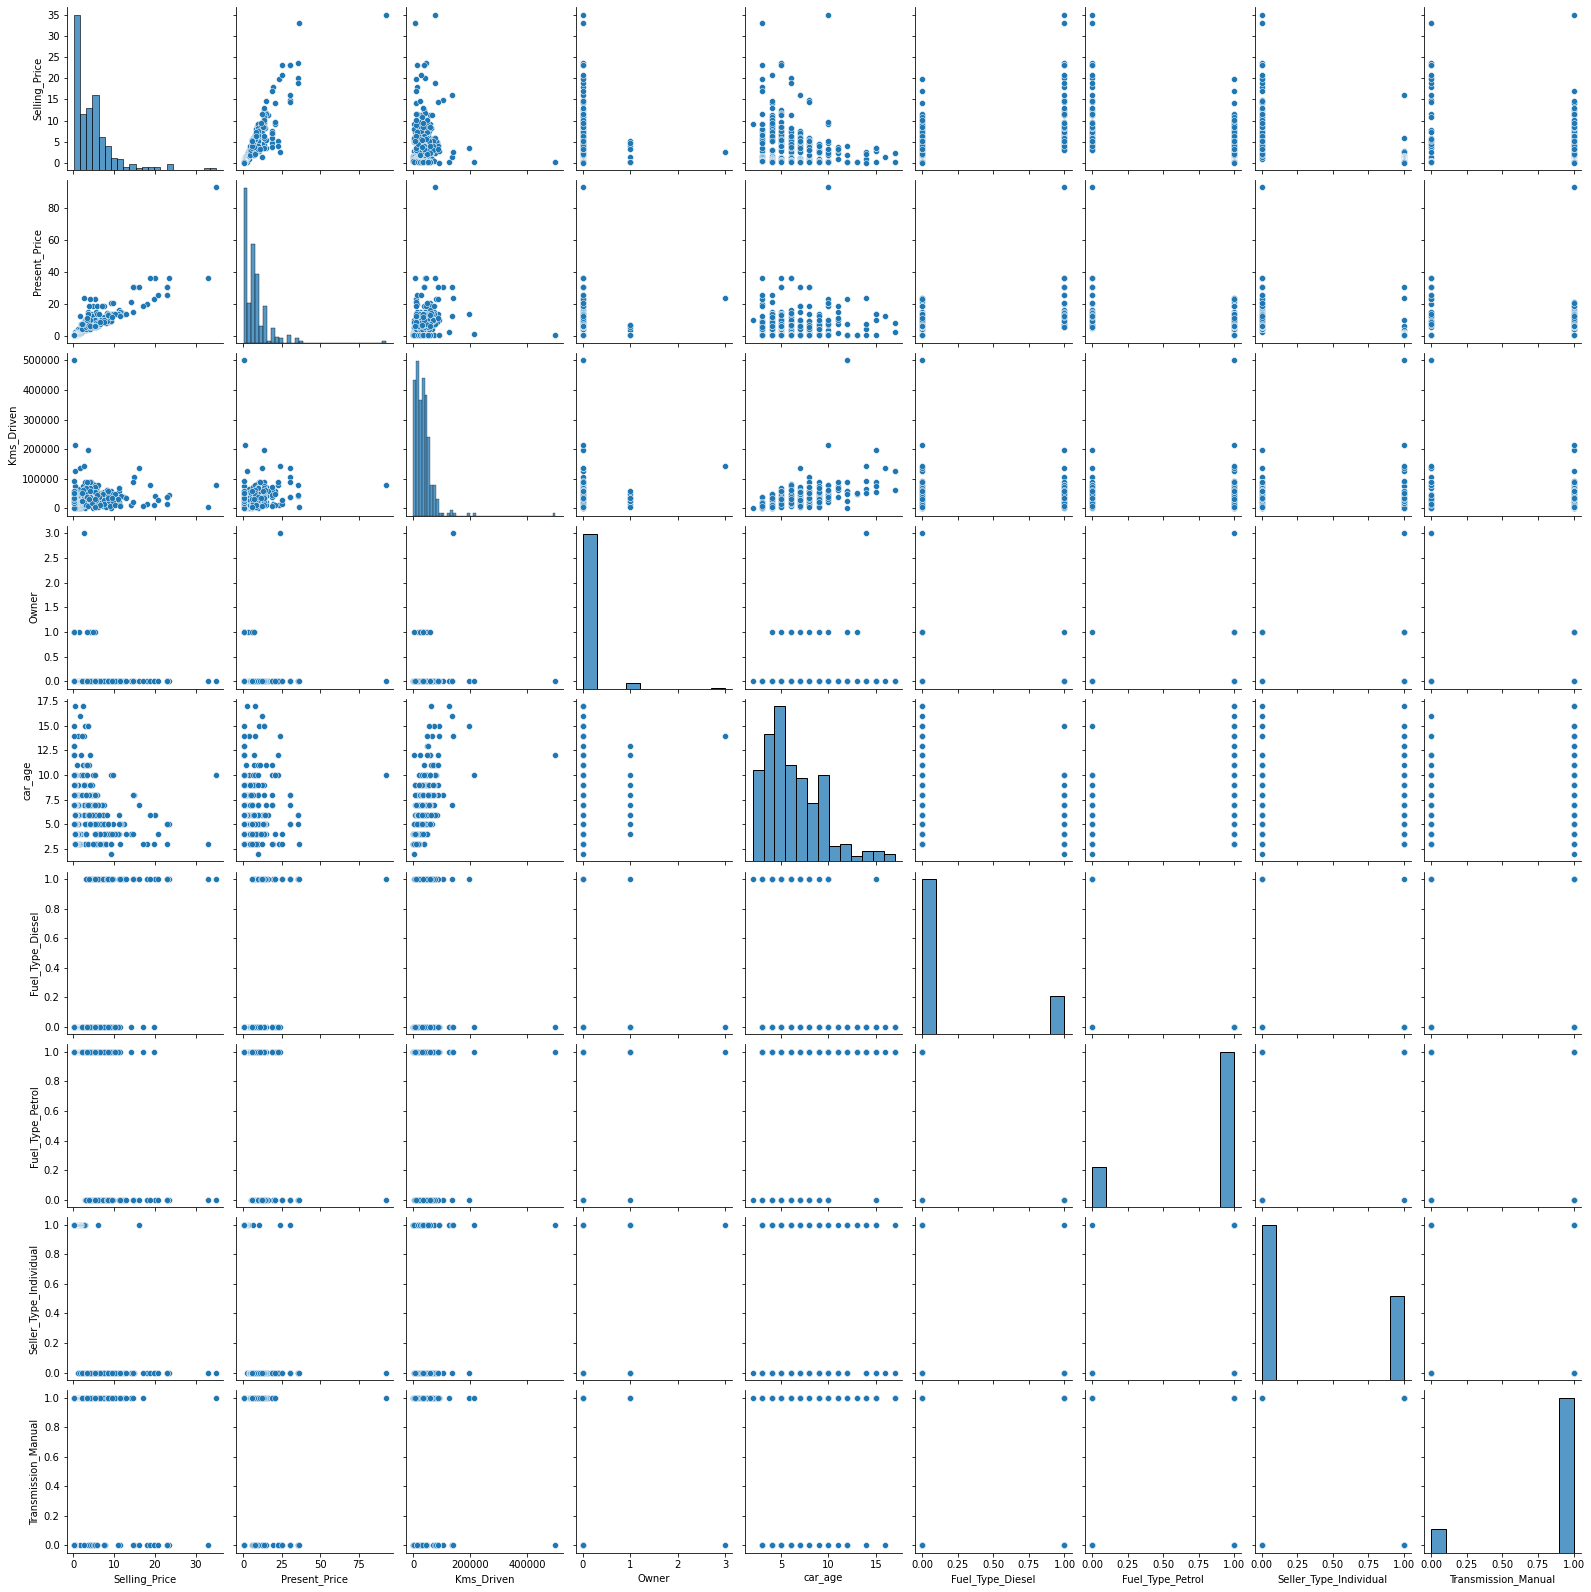

In [98]:
_ = sns.pairplot(df)

In [103]:
# split data into X and Y
X = df.drop('Selling_Price', axis=1)
Y = df['Selling_Price']

In [104]:
X.head()

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [107]:
# Get feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, Y)

model.feature_importances_

array([0.33816988, 0.03881494, 0.00038298, 0.07757538, 0.25110446,
       0.00894875, 0.1296923 , 0.15531131])

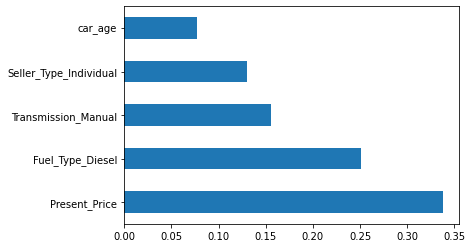

In [115]:
# plot feature importance for better visualization
_ = pd.Series(model.feature_importances_, index=X.columns).nlargest(5).plot(kind='barh')

In [116]:
# train model
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2, random_state=42)
Xtrain.shape, Xtest.shape

((240, 8), (61, 8))

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_samples_leaf = [2, 5, 10, 15, 100]
min_samples_split = [1, 2, 5, 10]

param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_leaf' : min_samples_leaf,
    'min_samples_split' : min_samples_split
}
print(param_grid)


rf_model = RandomForestRegressor()
rf_grid_model = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_grid, 
                                   scoring='neg_mean_squared_error',
                                   n_iter=10, cv=5, verbose=2, 
                                   random_state=42, n_jobs=-1)
rf_grid_model.fit(X, Y)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [2, 5, 10, 15, 100], 'min_samples_split': [1, 2, 5, 10]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [128]:
pred = rf_grid_model.predict(Xtest)
pred

array([ 0.36837771, 10.29030203,  5.03983346,  0.21089429,  6.90663765,
        7.21795823,  1.11981777,  0.56382422,  0.44220571,  6.37540738,
        8.36103812,  1.07924204,  7.12524785,  0.44526586,  5.38944156,
        2.7674772 ,  1.05847458, 15.52433803,  0.44602016,  1.58938059,
        0.37109906,  8.07194942,  4.98949866,  2.8643948 ,  0.5324775 ,
        3.51428319,  5.37564004,  3.03520467,  1.18446473,  1.15930253,
        0.53048181,  8.20145193,  0.44536228,  2.48182232,  7.93636921,
        4.21046237,  5.84089937,  4.46048123,  2.73864698,  5.64392218,
        3.84681017,  3.02460011,  4.74101227,  0.50901636,  6.82636059,
        0.69861706,  7.54520849,  7.26111019,  3.15281891,  3.51510432,
        5.18914559,  1.43664894, 21.84180622, 20.98455059,  7.36851897,
       10.18103274,  5.16741366,  9.27994314,  2.48645517,  7.06845438,
        0.26947606])

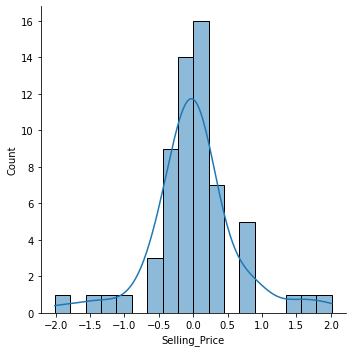

In [136]:
# plt.subplot(1,2,1)
_=sns.displot(ytest - pred, kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


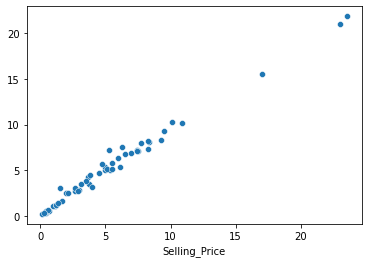

In [137]:
# plt.subplot(1,2,2)
_=sns.scatterplot(ytest, pred)

In [141]:
import joblib
try:
    os.mkdir('saved_models')
except:
    pass
joblib.dump(rf_grid_model, filename='saved_models/rf_modle.pkl')

['saved_models/rf_modle.pkl']

In [3]:
!pip freeze > requirement.txt